<a href="https://colab.research.google.com/github/A-vidhyalakshmi/Loantap-case-study/blob/main/Loantap-case-study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LOANTAP LOGISTIC REGRESSION BIZ CASE STUDY


LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.

The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

LoanTap deploys formal credit to salaried individuals and businesses 4 main financial instruments:

1. Personal Loan

2. EMI Free Loan

3. Personal Overdraft

4. Advance Salary Loan

This case study will focus on the underwriting process behind Personal Loan only



### PROBLEM STATEMENT

Given a set of attributes for an Individual,

1. Determine if a credit line should be extended to the individual.

2. If so, what should the repayment terms be in business recommendations?

3. The main challenge is to minimise the risk of NPAs by flagging defaulters while maximising opportunity to earn interest by disbursing loans to as many customers as possible.

### Concept Used:

1. Exploratory Data Analysis

2. Feature Engineering

3. Logistic Regression

4. Precision Vs Recall Tradeoff




To get insights and make better business decision, we need functions and methods, so we must import Python libraries into our work notebook.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as clr

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score,recall_score,f1_score,classification_report
from  sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc,average_precision_score


To get the data into our work space we use the below code(to read csv files)
and saving the whole set of data into a single variable(dataframe) which makes analysis easier

In [ ]:
!wget 'https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d' -O LoanTap.csv

--2024-03-08 17:40:47--  https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
Resolving drive.google.com (drive.google.com)... 142.251.16.100, 142.251.16.139, 142.251.16.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.16.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d [following]
--2024-03-08 17:40:47--  https://drive.usercontent.google.com/download?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.167.132, 2607:f8b0:4004:c1d::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.167.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 100353395 (96M) [application/octet-stream]
Saving to: ‘LoanTap.csv’

LoanTap.csv         100%[===================>]  95.70M  91.8MB/s    in 1.0s    

2024-03-08 17:40:53 (91.8 MB/s)

In [ ]:
df = pd.read_csv('LoanTap.csv')

### TO GET BASIC UNDERSTANDING OF THE DATASET


In [ ]:
df.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


In [ ]:
df.tail(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."
396029,2000.0,36 months,13.61,67.98,C,C2,Internal Revenue Service,10+ years,RENT,42996.0,...,3.0,0.0,4292.0,91.3,19.0,f,INDIVIDUAL,NaN,0.0,"787 Michelle Causeway\r\nBriannaton, AR 48052"


In [ ]:
df.sample(2)


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
128810,25000.0,36 months,11.71,826.90,B,B3,NaN,2 years,RENT,120000.0,...,8.0,0.0,21412.0,45.5,25.0,f,INDIVIDUAL,NaN,0.0,"9208 Gonzalez Causeway\r\nBeckerville, IL 30723"
393504,6250.0,36 months,12.29,208.46,C,C1,NaN,NaN,RENT,24000.0,...,10.0,1.0,941.0,9.7,17.0,f,INDIVIDUAL,0.0,1.0,0590 Shelton Crossing Suite 899\r\nNorth Dougl...


In [ ]:
# TO GET NO. OF ROWS & COLUMNS:

df.shape

(396030, 27)

In [ ]:
# TO GET TOTAL ELEMENTS IN THE DATASET (i.e., the dot product of no. of rows & columns)

df.size

10692810

In [ ]:
# To get index

df.index

RangeIndex(start=0, stop=396030, step=1)

In [ ]:
# TO GET THE NAMES OF THE COLUMNS

df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [ ]:
# TO GET THE NAMES OF THE COLUMNS(alternate method)

df.keys()

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

### MEMORY SPACE UTILIZATION


In [ ]:
# To get memory usage of each column

df.memory_usage()

In [ ]:
# TO GET THE TOTAL INFORMATION ABOUT THE DATASET.
# info function let us know the columns with their data types and no. of non-null values & the total memory usage


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [ ]:
float_cols = ['loan_amnt','int_rate','installment','annual_inc','dti','open_acc','pub_rec','revol_bal','revol_util','total_acc','mort_acc','pub_rec_bankruptcies']
for i in float_cols:
  df[i] = df[i].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float32
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float32
 3   installment           396030 non-null  float32
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float32
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

### INFERENCE:

The Memory usage which was 81.6+ MB has been reduced to **63.5+ MB**

## CONVERTING CATEGORICAL COLUMNS INTO DATETIME DTYPE

In [ ]:
cols = ['issue_d','earliest_cr_line']
for i in cols:
  df[i] = pd.to_datetime(df[i])


In [ ]:
df['earliest_cr_line'].value_counts()[:5]

2000-10-01    3017
2000-08-01    2935
2001-10-01    2896
2001-08-01    2884
2000-11-01    2736
Name: earliest_cr_line, dtype: int64

## CONVERTING COLUMNS TO CATEGORY

In [ ]:
cat_cols = ['term','grade','sub_grade','home_ownership','verification_status','loan_status','purpose','initial_list_status','application_type']

for i in cat_cols:
  df[i] = df[i].astype('category')


## Convert employment length to numeric

In [ ]:
d = {'10+ years':10, '4 years':4, '< 1 year':0,
     '6 years':6, '9 years':9,'2 years':2, '3 years':3,
     '8 years':8, '7 years':7, '5 years':5, '1 year':1}
df['emp_length']=df['emp_length'].replace(d)
df['emp_length'].astype('float32')

df.info()

### MISSING VALUE DETECTION


In [ ]:
df.isnull().sum()


### INFERENCE:

There are few missing values in columns like emp_title, emp_length, title, revol_util, mort_acc, pub_rec_bankruptcies.

Handling the missing values has to be done after analysing/ understanding the column distribution and its property

## TREATING MISSING VALUES

In [ ]:
df['emp_title'].fillna('unknown', inplace=True)
df['title'].fillna('unknown', inplace=True)


df['mort_acc'].fillna(round(df['mort_acc'].mean(),2),inplace=True)


df['emp_length'].fillna(round(df['emp_length'].mean(),2),inplace=True)


df.dropna(inplace = True)

df.isna().sum()

In [ ]:
df.shape

## Check for duplicates


In [ ]:
duplicate_rows = len(df[df.duplicated()])
duplicate_rows

0

### INFERENCE:

There are **No Duplicates** in the dataset

### NON GRAPHICAL ANALYSIS

In [ ]:
df['term'].value_counts()

 36 months    301247
 60 months     93972
Name: term, dtype: int64

In [ ]:
df['grade'].value_counts()

B    115812
C    105775
A     64056
D     63364
E     31427
F     11740
G      3045
Name: grade, dtype: int64

In [ ]:
df['sub_grade'].value_counts()

B3    26611
B4    25558
C1    23609
C2    22541
B2    22457
B5    22046
C3    21178
C4    20232
B1    19140
A5    18500
C5    18215
D1    15947
A4    15763
D2    13916
D3    12196
D4    11625
A3    10537
A1     9717
D5     9680
A2     9539
E1     7906
E2     7410
E3     6196
E4     5354
E5     4561
F1     3530
F2     2756
F3     2277
F4     1782
F5     1395
G1     1057
G2      752
G3      552
G4      371
G5      313
Name: sub_grade, dtype: int64

In [ ]:
df['home_ownership'].value_counts()


MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [ ]:
df['emp_title'].value_counts()

unknown                 22881
Teacher                  4387
Manager                  4249
Registered Nurse         1855
RN                       1844
                        ...  
OMIV Supervisor             1
SVP, Technology             1
sikorsky                    1
Postman                     1
Gracon Services, Inc        1
Name: emp_title, Length: 172651, dtype: int64

In [ ]:
df['verification_status'].value_counts()


Verified           139451
Source Verified    131301
Not Verified       124467
Name: verification_status, dtype: int64

In [ ]:
df['loan_status'].value_counts()


Fully Paid     317696
Charged Off     77523
Name: loan_status, dtype: int64

In [ ]:
df['purpose'].value_counts()


debt_consolidation    234169
credit_card            82923
home_improvement       23961
other                  21059
major_purchase          8756
small_business          5656
car                     4670
medical                 4175
moving                  2842
vacation                2442
house                   2197
wedding                 1794
renewable_energy         329
educational              246
Name: purpose, dtype: int64

In [ ]:
df['initial_list_status'].value_counts()


f    237346
w    157873
Name: initial_list_status, dtype: int64

In [ ]:
df['application_type'].value_counts()


INDIVIDUAL    394508
JOINT            425
DIRECT_PAY       286
Name: application_type, dtype: int64

In [ ]:
df['pub_rec_bankruptcies'].value_counts()


0.0    350108
1.0     42786
2.0      1847
3.0       351
4.0        82
5.0        32
6.0         7
7.0         4
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

In [ ]:
df['emp_length'].value_counts()


10.00    125876
2.00      35741
3.00      31598
0.00      31564
5.00      26455
1.00      25785
4.00      23903
6.00      20803
7.00      20783
8.00      19131
5.94      18290
9.00      15290
Name: emp_length, dtype: int64

### STATISTICAL SUMMERY


In [ ]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
loan_amnt,395219.0,14122.061523,8357.054688,500.00,8000.000000,12000.000000,20000.000000,4.000000e+04
int_rate,395219.0,13.642095,4.472945,5.32,10.490000,13.330000,16.549999,3.099000e+01
installment,395219.0,432.069031,250.700150,16.08,250.330002,375.489990,567.789978,1.533810e+03
emp_length,395219.0,5.941788,3.559310,0.00,3.000000,6.000000,10.000000,1.000000e+01
annual_inc,395219.0,74199.367188,61557.250000,0.00,45000.000000,64000.000000,90000.000000,8.706582e+06
dti,395219.0,17.390757,18.032698,0.00,11.300000,16.920000,22.990000,9.999000e+03
open_acc,395219.0,11.318494,5.134902,1.00,8.000000,10.000000,14.000000,9.000000e+01
pub_rec,395219.0,0.178481,0.531098,0.00,0.000000,0.000000,0.000000,8.600000e+01
revol_bal,395219.0,15851.653320,20584.267578,0.00,6038.000000,11190.000000,19626.000000,1.743266e+06
revol_util,395219.0,53.808765,24.440088,0.00,35.900002,54.799999,72.900002,8.923000e+02


In [ ]:
df.describe(include = object).T


,count,unique,top,freq
emp_title,395219,172651,unknown,22881
title,395219,48473,Debt consolidation,152392
address,395219,392898,USCGC Smith\r\nFPO AE 70466,8


# EXPLORATORY DATA ANALYSIS

## UNIVARIATE ANALYSIS

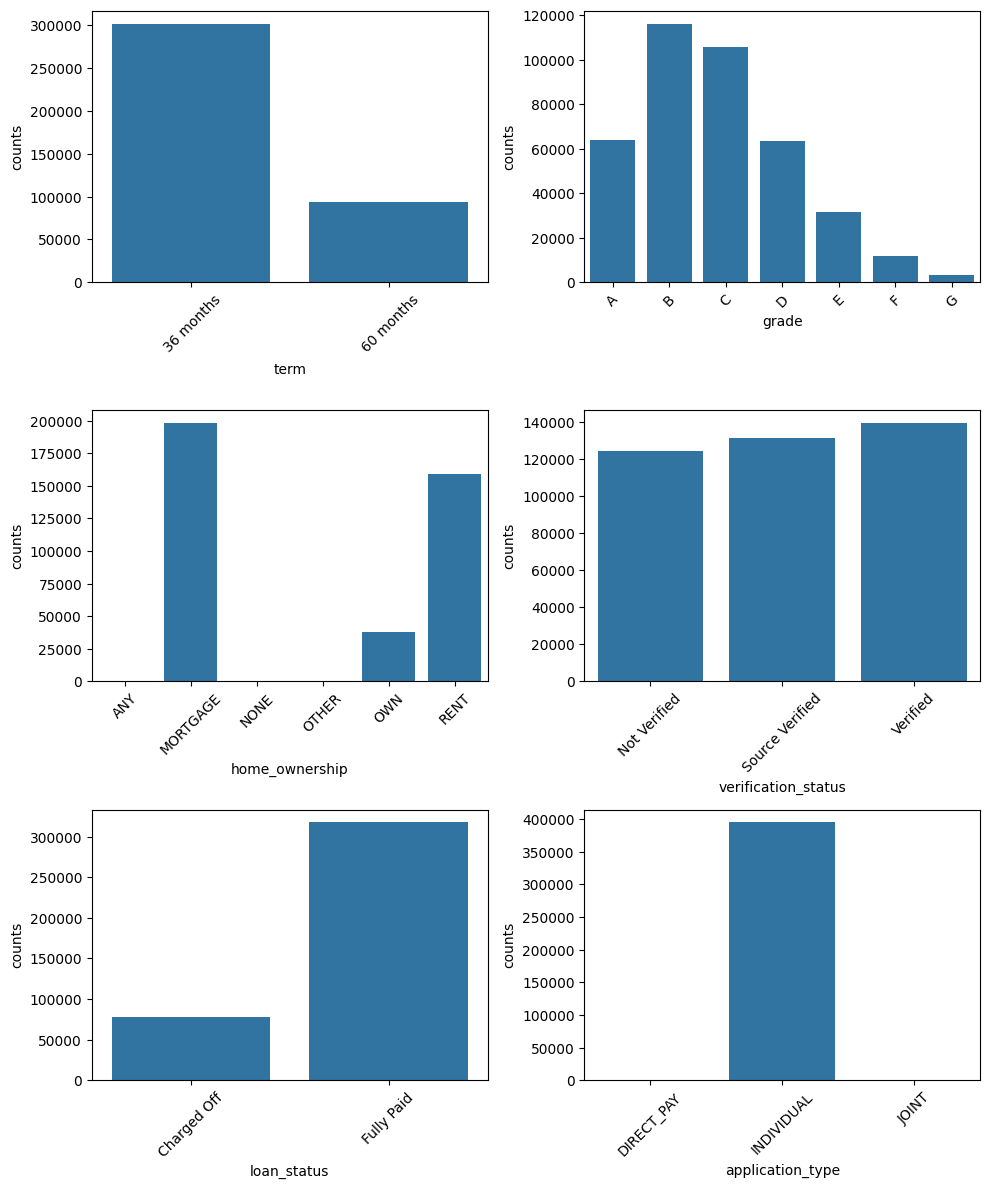

In [ ]:
cols = ['term','grade','home_ownership','verification_status','loan_status','application_type']

plt.figure(figsize= (10,15))
for i in range(len(cols)):
  plt.subplot(4,2,i+1)

  sns.barplot(df[cols[i]].value_counts())
  plt.xticks(rotation = 45)
  plt.xlabel(cols[i])
  plt.ylabel('counts')


plt.tight_layout()
plt.show()

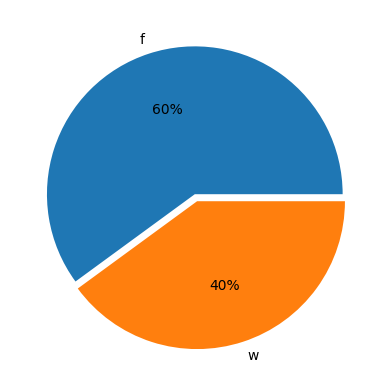

In [ ]:
temp = df['initial_list_status'].value_counts()
plt.pie(temp,labels = temp.index,explode = [0,0.05], autopct='%.0f%%')
plt.show()

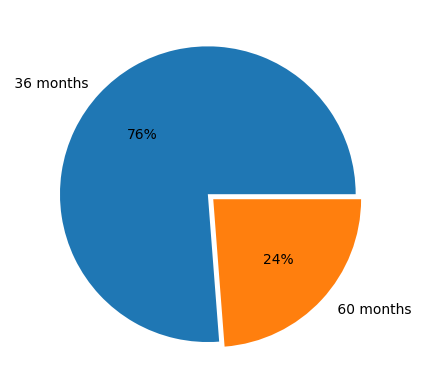

In [ ]:
temp = df['term'].value_counts()
plt.pie(temp,labels = temp.index,explode = [0,0.05], autopct='%.0f%%')
plt.show()

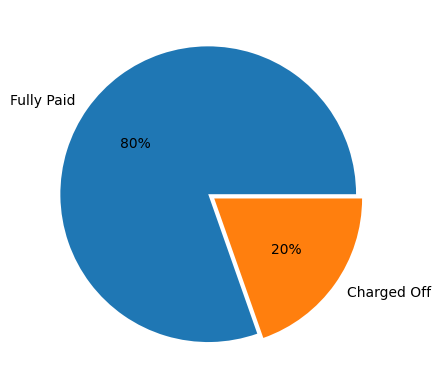

In [ ]:
temp = df['loan_status'].value_counts()
plt.pie(temp,labels = temp.index,explode = [0,0.05], autopct='%.0f%%')
plt.show()

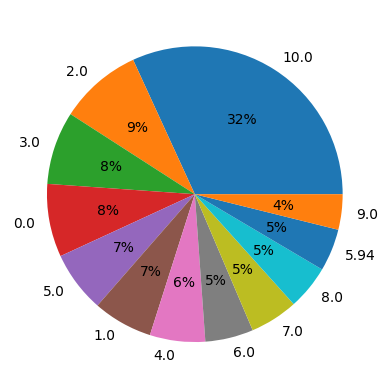

In [ ]:
temp = df['emp_length'].value_counts()
plt.pie(temp,labels = temp.index, autopct='%.0f%%')
plt.show()

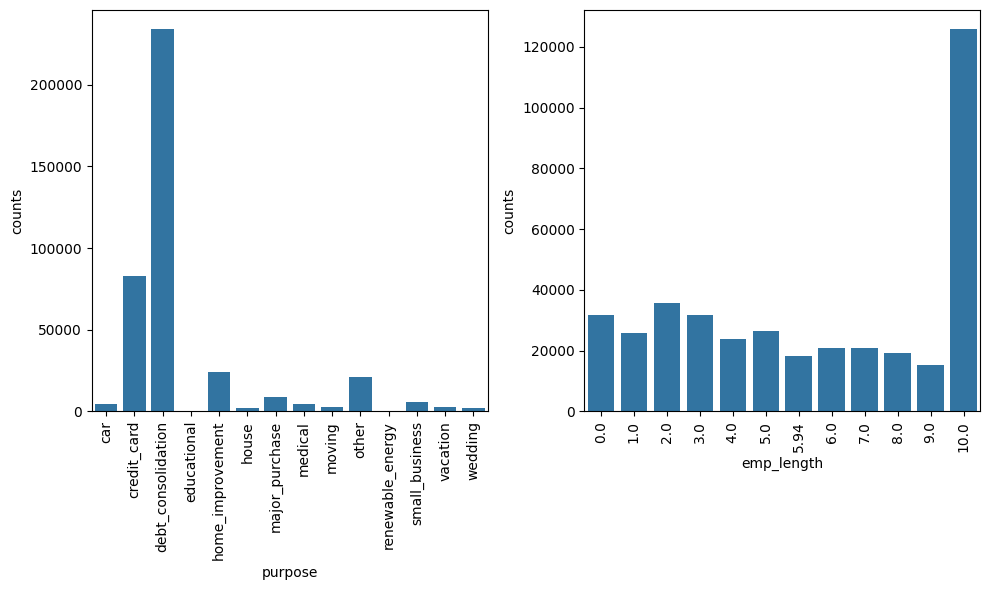

In [ ]:
col_1 = ['purpose','emp_length']

plt.figure(figsize= (10,6))
for i in range(len(col_1)):
  plt.subplot(1,2,i+1)

  sns.countplot(x=col_1[i] , data = df)

  plt.xticks(rotation = 90)
  plt.xlabel(col_1[i])
  plt.ylabel('counts')


plt.tight_layout()
plt.show()

### INFERENCE:

1. About **76%** of the loans have a term of **36 months** (triple the number of loans with 60 months term)

2. **Majority** of the borrowers fall under the grade **B** followed by grade C and D

3. Almost all the loan application where applied for **INDIVIDUALS**

4. The status of **80%** of the loans were **fully paid**

5. Most loans were applied for the purpose of **debt consolidation**

6. Borrowers who has **10+ years** of work experience were given **priority** for the loan allocation


## BIVARIATE ANALYSIS:

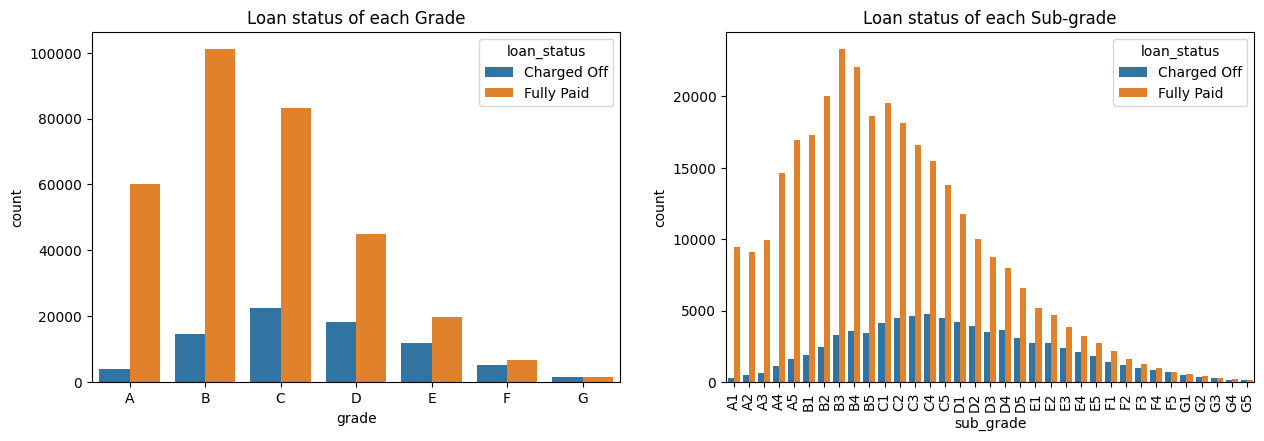

In [ ]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.countplot(x='grade', data = df, hue='loan_status')
plt.title('Loan status of each Grade')

plt.subplot(2, 2, 2)
sns.countplot(x='sub_grade', data=df, hue='loan_status')
plt.xticks(rotation=90)
plt.title('Loan status of each Sub-grade')


plt.show()

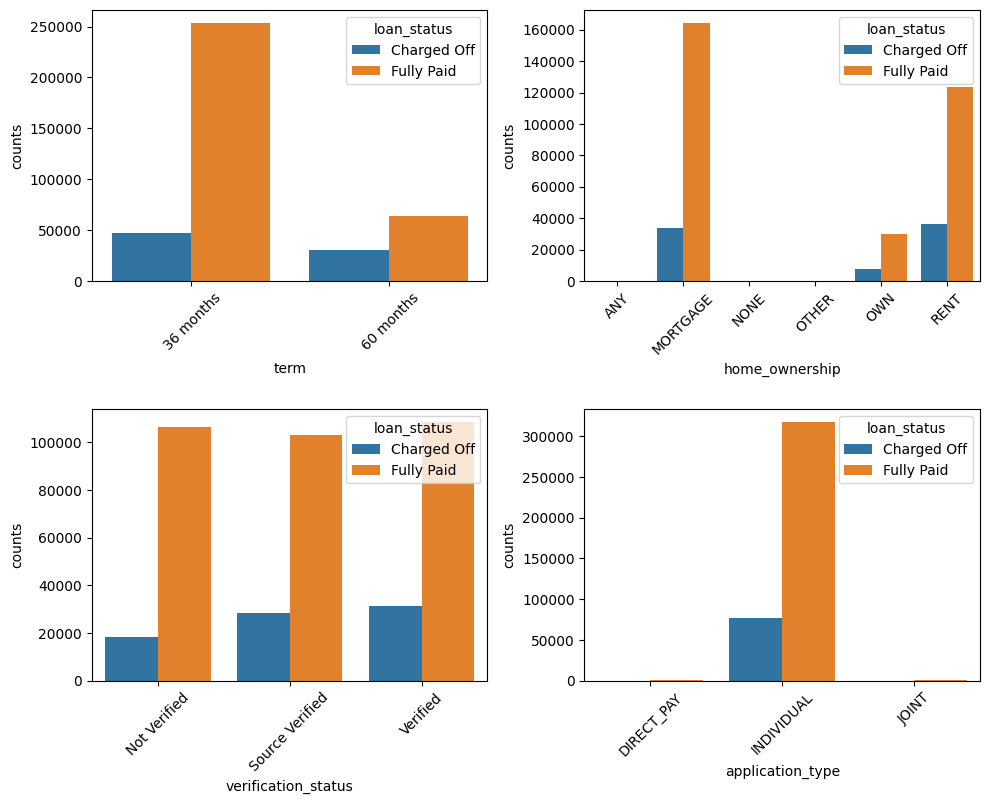

In [ ]:
cols = ['term','home_ownership','verification_status','application_type']

plt.figure(figsize= (10,15))
for i in range(len(cols)):
  plt.subplot(4,2,i+1)

  sns.countplot(x=cols[i] , data = df, hue='loan_status')

  plt.xticks(rotation = 45)
  plt.xlabel(cols[i])
  plt.ylabel('counts')


plt.tight_layout()
plt.show()

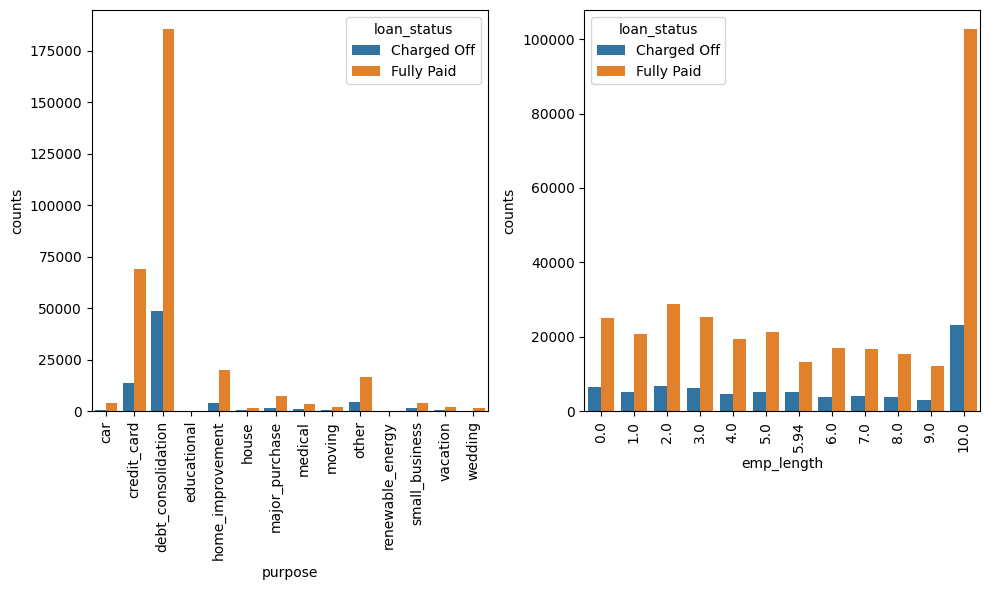

In [ ]:
col_1 = ['purpose','emp_length']

plt.figure(figsize= (10,6))
for i in range(len(col_1)):
  plt.subplot(1,2,i+1)

  sns.countplot(x=col_1[i] , data = df, hue='loan_status')

  plt.xticks(rotation = 90)
  plt.xlabel(col_1[i])
  plt.ylabel('counts')


plt.tight_layout()
plt.show()

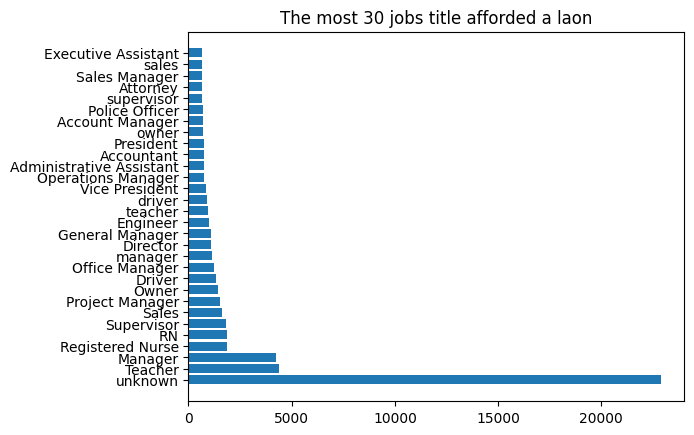

In [ ]:
plt.barh(df.emp_title.value_counts()[:30].index,df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a laon")
plt.show()

### INFERENCE:

1. Be it any kind of loan or any grade of the borrower or any other condition, the **majority** falls under **fully_paid** category of the loan status

2. **Grade B** borrowers accounts to the maximum **fully paid** loan status whereas **Grade C** borrowers had the **highest** number of **charged off** loan status

3. More specifically, **B3** sub_grader's loan status are maximum **fully paid** and **C4** sub-grader's loan status are maximum **Charged off**

4. Majority of the borrowers of known employment category are **Teachers**



## MULTIVARIATE ANALYSIS

In [ ]:
df.corr()

<ipython-input-75-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168599,0.953872,0.097493,0.337364,0.016338,0.198347,-0.078143,0.328515,0.099581,0.223695,0.212419,-0.106669
int_rate,0.168599,1.000000,0.162442,0.011536,-0.057035,0.078758,0.011753,0.060857,-0.011290,0.293195,-0.036749,-0.079164,0.057588
installment,0.953872,0.162442,1.000000,0.086270,0.330855,0.015511,0.188815,-0.068220,0.316664,0.123635,0.202255,0.185363,-0.098748
emp_length,0.097493,0.011536,0.086270,1.000000,0.066691,0.018032,0.042291,0.036007,0.086027,0.036944,0.114620,0.183577,0.037168
annual_inc,0.337364,-0.057035,0.330855,0.066691,1.000000,-0.081730,0.136620,-0.013718,0.299758,0.027920,0.193395,0.224347,-0.050145
dti,0.016338,0.078758,0.015511,0.018032,-0.081730,1.000000,0.135907,-0.017820,0.063461,0.088023,0.101772,-0.025142,-0.014600
open_acc,0.198347,0.011753,0.188815,0.042291,0.136620,0.135907,1.000000,-0.018799,0.221053,-0.131821,0.680745,0.104925,-0.028042
pub_rec,-0.078143,0.060857,-0.068220,0.036007,-0.013718,-0.017820,-0.018799,1.000000,-0.101883,-0.076257,0.019481,0.011481,0.699408
revol_bal,0.328515,-0.011290,0.316664,0.086027,0.299758,0.063461,0.221053,-0.101883,1.000000,0.226305,0.191474,0.189693,-0.124694
revol_util,0.099581,0.293195,0.123635,0.036944,0.027920,0.088023,-0.131821,-0.076257,0.226305,1.000000,-0.104694,0.007049,-0.086751


<ipython-input-76-9bb275b99996>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='viridis')


<Axes: >

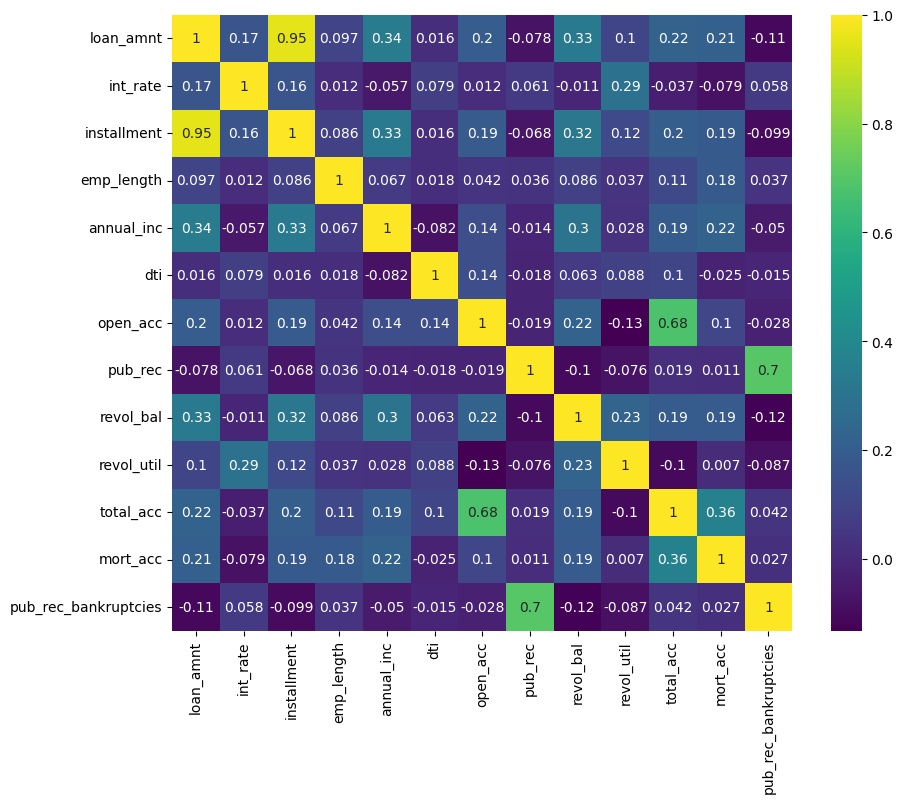

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

### INFERENCE:

1. Loan amount and installment are **95%** **correlated**. So one of the column must be **dropped** to **avoid** the problem of **multicolinearity**.

2. Total_acc and Open_acc are also highly correlated (0.68)

3. There is 70% correlation between pub_rec and pub_rec_bankruptcies

## BOX PLOT -- OUTLIER DETECTION

In [ ]:
num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

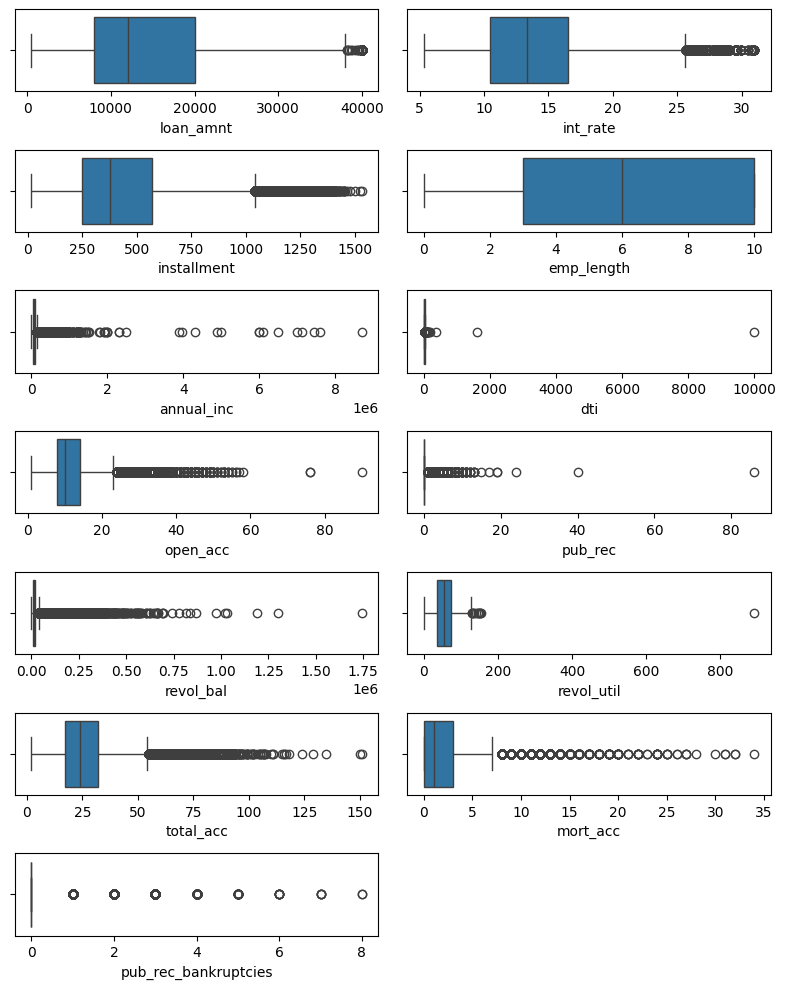

In [ ]:
plt.figure(figsize=(8,10))

for i in range(len(num_cols)):
  plt.subplot(7,2,i+1)
  sns.boxplot(x=df[num_cols[i]])
plt.tight_layout()
plt.show()

### INFERENCE:

It can be clearly seen that there are many outliers in almost all the numerical columns except emp_length

### TREATING OUTLIERS

In [ ]:
# Convert pub_rec and pub_rec_bankruptcies to categorical variables

df['pub_rec_bankruptcies'] = np.where(df['pub_rec_bankruptcies']>0,'yes','no')
df['pub_rec'] = np.where(df['pub_rec']>0,'yes','no')
df[['pub_rec_bankruptcies','pub_rec']] = df[['pub_rec_bankruptcies','pub_rec']].astype('category')


In [ ]:
# update num_cols

num_cols = df.select_dtypes(include='number').columns
num_cols

Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc'],
      dtype='object')

In [ ]:
#Removing outliers using standard deviation
for col in num_cols:
  mean=df[col].mean()
  std=df[col].std()
  upper = mean + (3*std)
  df = df[~(df[col]>upper)]


In [ ]:
df.shape

(368079, 27)

## FEATURE ENGINEERING

In [ ]:
# Dropping Installment column to avoid MULTICOLINEARITY

df.drop('installment', axis=1, inplace=True)

<ipython-input-83-82d7c48d43b1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('installment', axis=1, inplace=True)


In [ ]:
df['address'].head(5)


0       0174 Michelle Gateway\r\nMendozaberg, OK 22690
1    1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113
2    87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113
3              823 Reid Ford\r\nDelacruzside, MA 00813
4               679 Luna Roads\r\nGreggshire, VA 11650
Name: address, dtype: object

In [ ]:
df[['state','zip_code']] = df['address'].apply (lambda x: pd.Series([x[-8:-6], x[-5:]]))
df.keys()

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'address', 'state', 'zip_code'],
      dtype='object')

In [ ]:
df.drop('address',axis=1,inplace=True)
df.keys()

Index(['loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'dti', 'earliest_cr_line',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'mort_acc',
       'pub_rec_bankruptcies', 'state', 'zip_code'],
      dtype='object')

In [ ]:
df['zip_code'].nunique()


10

Since there are only 10 zipcodes, we can change the datatype of zipcodes to categorical


In [ ]:
df['zip_code'] = df['zip_code'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368079 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             368079 non-null  float32       
 1   term                  368079 non-null  category      
 2   int_rate              368079 non-null  float32       
 3   grade                 368079 non-null  category      
 4   sub_grade             368079 non-null  category      
 5   emp_title             368079 non-null  object        
 6   emp_length            368079 non-null  float64       
 7   home_ownership        368079 non-null  category      
 8   annual_inc            368079 non-null  float32       
 9   verification_status   368079 non-null  category      
 10  issue_d               368079 non-null  datetime64[ns]
 11  loan_status           368079 non-null  category      
 12  purpose               368079 non-null  category      
 13 

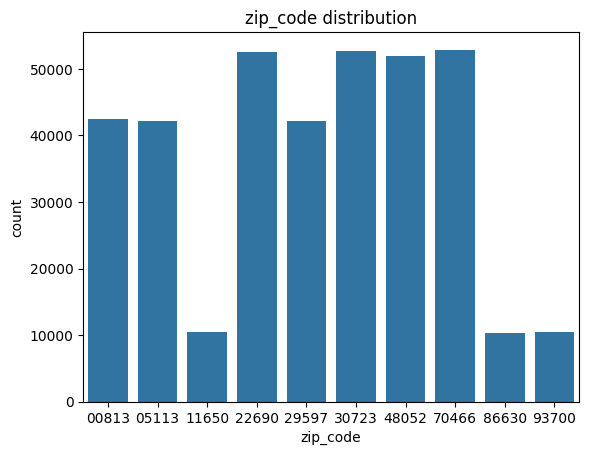

In [ ]:
# Distribution of zip code

sns.countplot(x=df['zip_code'])
plt.title('zip_code distribution')
plt.show()

### ANALYSING IMPACTS OF ALL FEATURES ON LOAN STATUS


The features which dont have any impact in the loan status are removed as well one of the features which has similar impact on the loan status is also removed

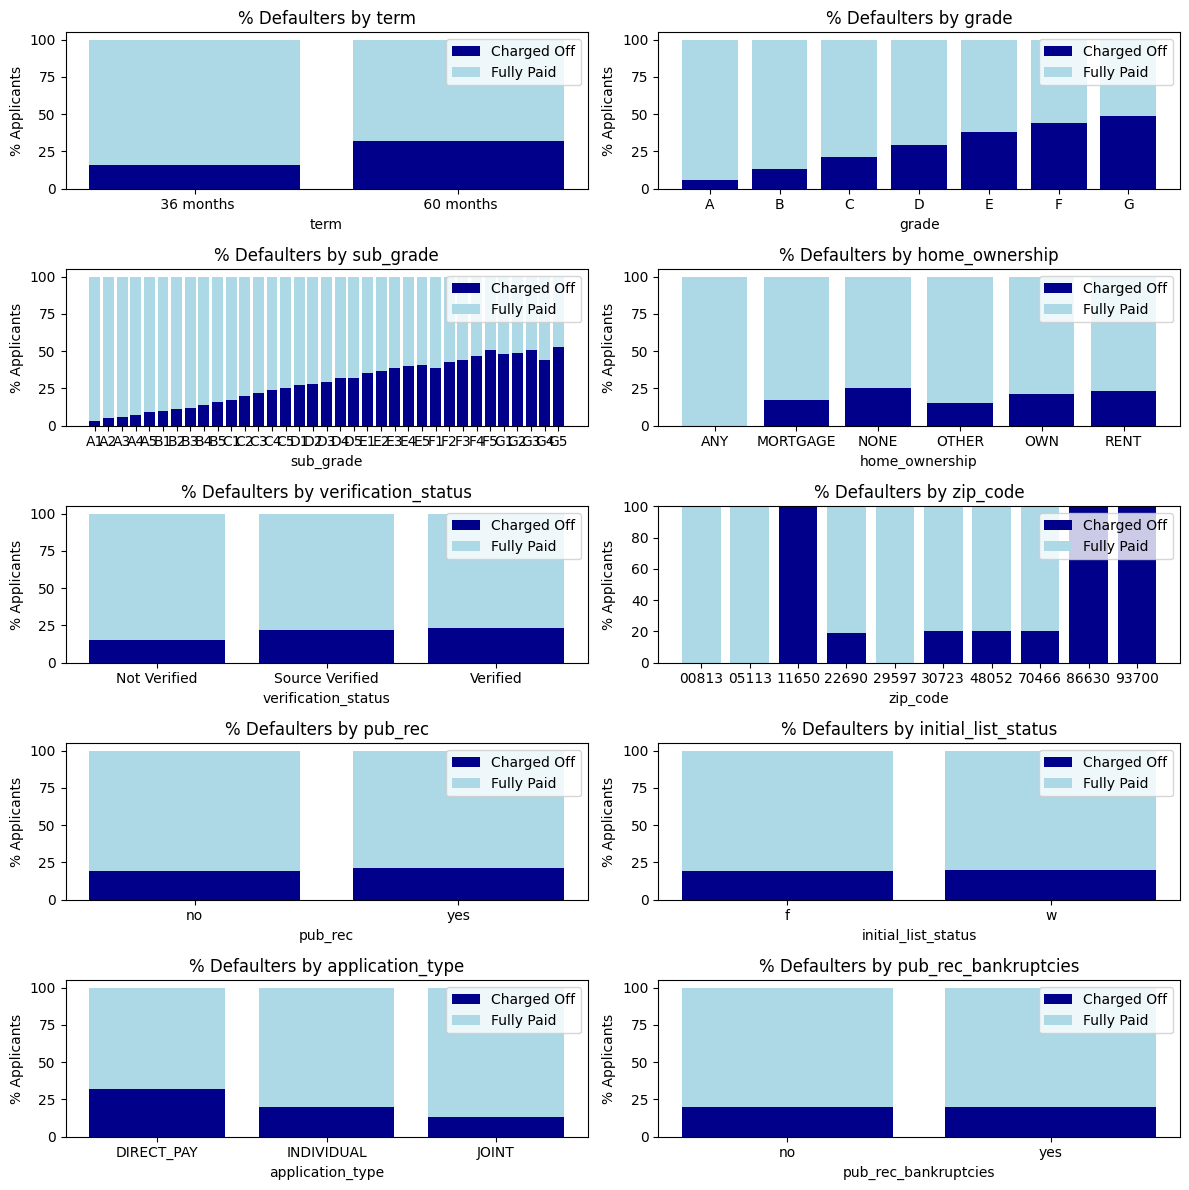

In [ ]:
# Impact of categorical factors on loan status

plot = ['term','grade', 'sub_grade', 'home_ownership', 'verification_status',
       'zip_code', 'pub_rec', 'initial_list_status',
       'application_type', 'pub_rec_bankruptcies']

plt.figure(figsize=(12,12))
i=1
for col in plot:
  ax=plt.subplot(5,2,i)

  data = df.pivot_table(index=col, columns='loan_status', aggfunc='count', values='purpose')
  data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
  data.reset_index(inplace=True)

  plt.bar(data[col],data['Charged Off'], color='#00008b')
  plt.bar(data[col],data['Fully Paid'], color='#add8e6', bottom=data['Charged Off'])
  plt.xlabel(f'{col}')
  plt.ylabel('% Applicants')
  plt.title(f'% Defaulters by {col}')
  plt.legend(['Charged Off','Fully Paid'])
  i += 1

plt.tight_layout()
plt.show()


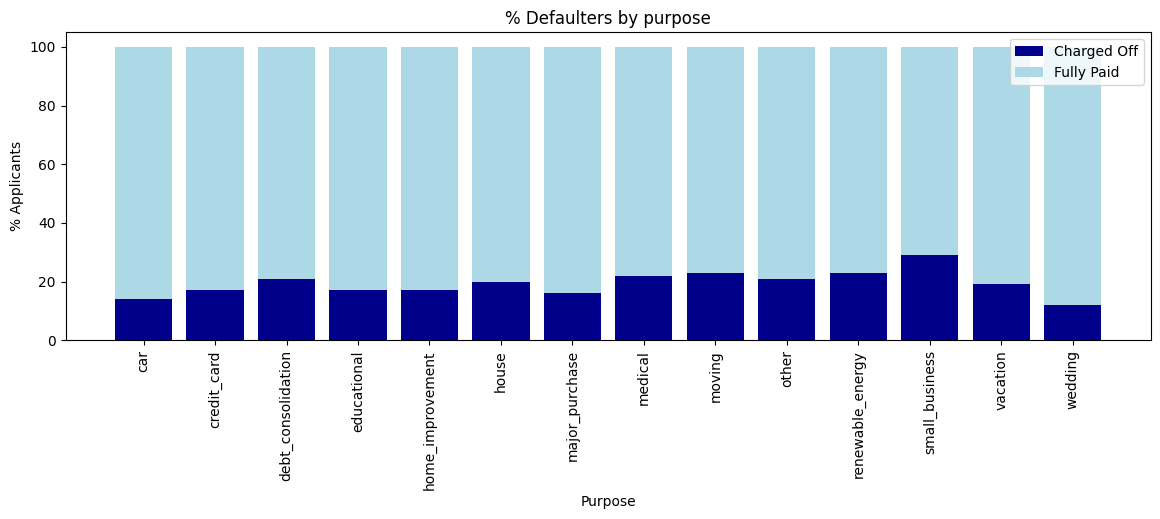

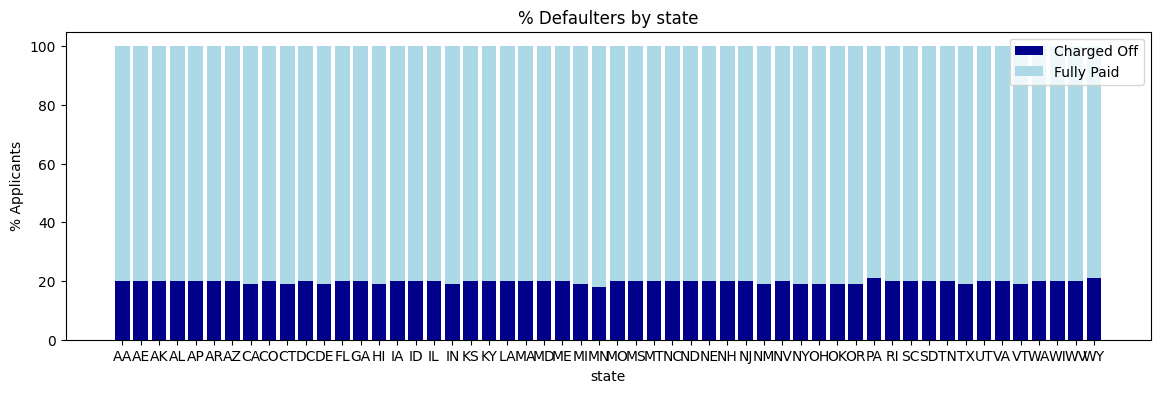

In [ ]:
# Impact of Purpose/state on loan status

purpose = df.pivot_table(index='purpose', columns='loan_status', aggfunc='count', values='sub_grade')
purpose = purpose.div(purpose.sum(axis=1), axis=0).multiply(100).round()
purpose.reset_index(inplace=True)

plt.figure(figsize=(14,4))
plt.bar(purpose['purpose'],purpose['Charged Off'], color='#00008b')
plt.bar(purpose['purpose'],purpose['Fully Paid'], color='#add8e6', bottom=purpose['Charged Off'])
plt.xlabel('Purpose')
plt.ylabel('% Applicants')
plt.title('% Defaulters by purpose')
plt.legend(['Charged Off','Fully Paid'])
plt.xticks(rotation=90)
plt.show()

state = df.pivot_table(index='state', columns='loan_status', aggfunc='count', values='sub_grade')
state = state.div(state.sum(axis=1), axis=0).multiply(100).round()
state.reset_index(inplace=True)

plt.figure(figsize=(14,4))
plt.bar(state['state'],state['Charged Off'], color='#00008b')
plt.bar(state['state'],state['Fully Paid'], color='#add8e6', bottom=state['Charged Off'])
plt.xlabel('state')
plt.ylabel('% Applicants')
plt.title('% Defaulters by state')
plt.legend(['Charged Off','Fully Paid'])
plt.show()


### IMPACTS:

1. The % of defaulters is much higher for longer (**60-months**) term

2. As expected, grade/sub-grade has the maximum impact on loan_status with **grade G** having maximum defaulters as well maximum loyal borrowers.

3. Surprisingly, source verified & verified appicants have more defaulters than non-verified applicants

4. Zip codes such as **11650, 86630** & **93700** have 100% defaulters

5. We can remove initial_list_status, public records and state as they have no impact on loan_status.

6. **Direct** pay application type has higher default rate compared to individual/joint

7. Loan taken for the purpose of **small business** has the highest defaulters


<ipython-input-92-947178d9e7c0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='loan_status', ax=ax[i,1],
<ipython-input-92-947178d9e7c0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='loan_status', ax=ax[i,1],
<ipython-input-92-947178d9e7c0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=col, x='loan_status', ax=ax[i,1],
<ipython-input-92-947178d9e7c0>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable t

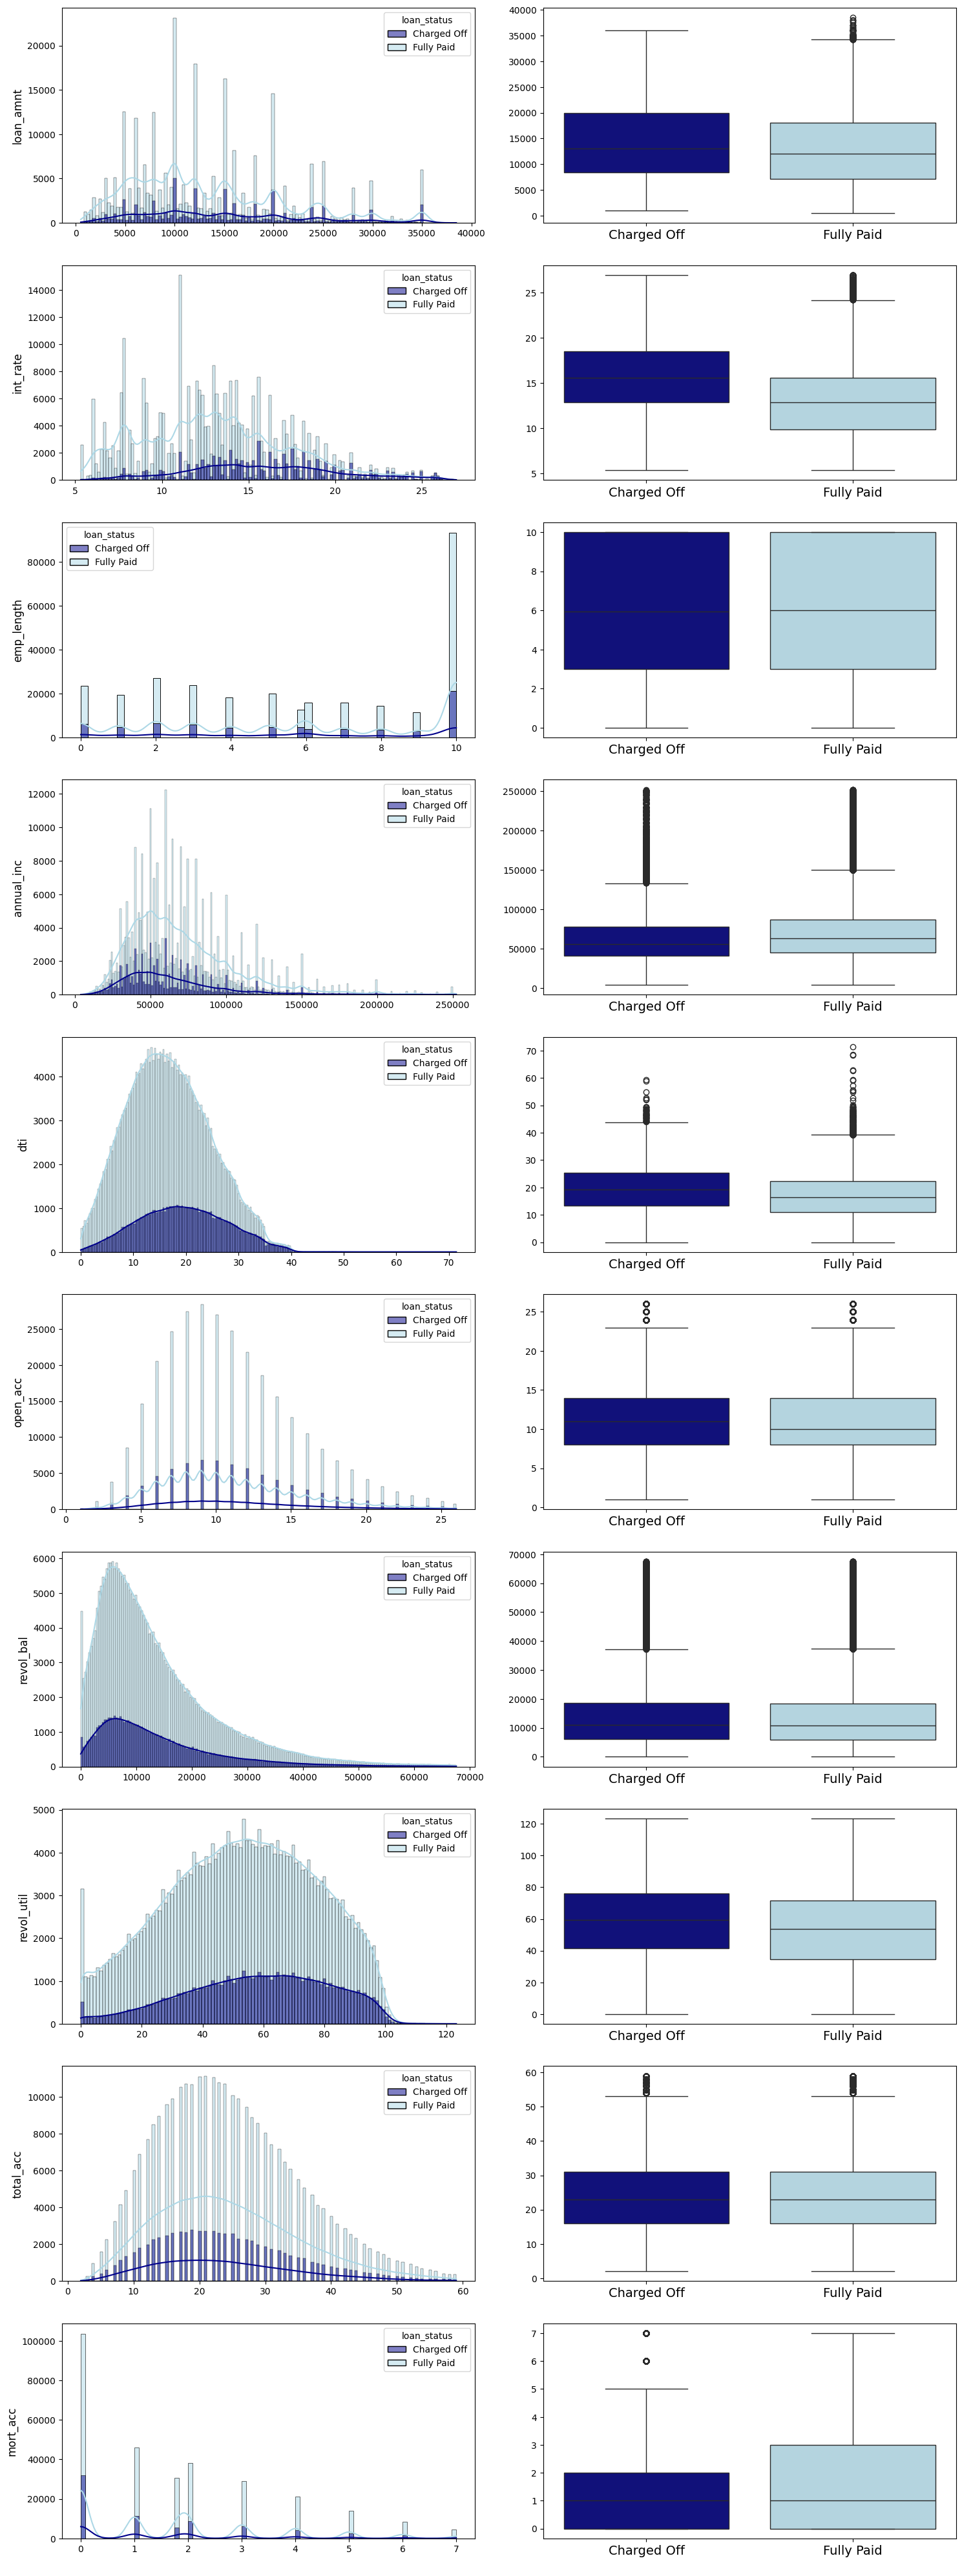

In [ ]:

# Impact of numerical features on loan_status

num_cols = df.select_dtypes(include='number').columns

fig, ax = plt.subplots(10,2,figsize=(15,40))
i=0
color_dict = {'Fully Paid': clr.to_rgba('#add8e6', 0.5),
              'Charged Off': clr.to_rgba('#00008b', 1)}
for col in num_cols:
    sns.histplot(data=df, x=col, hue='loan_status', ax=ax[i, 0], legend=True,
                palette=color_dict, kde=True, fill=True)
    sns.boxplot(data=df, y=col, x='loan_status', ax=ax[i,1],
               palette=('#00008b', '#add8e6'))
    ax[i,0].set_ylabel(col, fontsize=12)
    ax[i,0].set_xlabel(' ')
    ax[i,1].set_xlabel(' ')
    ax[i,1].set_ylabel(' ')
    ax[i,1].xaxis.set_tick_params(labelsize=14)
    i += 1

plt.tight_layout()
plt.show()

In [ ]:
# Remove columns which do not have an impact on loan_status
# Subgrade is removed because grade and subgrade are similar features


df.drop(columns=['state', 'initial_list_status',
                 'emp_title', 'title','earliest_cr_line',
                 'issue_d','sub_grade'],inplace=True)




# DATA PREPROCESSING

### ENCODING NUMERICAL VALUES TO TARGET VARIABLE

In [ ]:
df['loan_status'] = df['loan_status'].replace({'Charged Off':0, 'Fully Paid':1})

### SPLITTING FEATURES AND TARGET VARIABLE

In [ ]:

x = df.drop(columns=['loan_status'])
y = df['loan_status']


print('Shape of Dataset : ',df.shape)
print('Shape of Features : ',x.shape)
print('Shape of Target Variable : ',y.shape)

Shape of Dataset :  (368079, 20)
Shape of Features :  (368079, 19)
Shape of Target Variable :  (368079,)


In [ ]:
y.value_counts()

1    295520
0     72559
Name: loan_status, dtype: int64

### ENCODING BINARY FEATURES

In [ ]:
x['term'] = x['term'].apply(lambda x: 36 if x == '36 months' else 60).astype('int32')


### CREATING FLAGS

In [ ]:
x['pub_rec'] = x['pub_rec'].apply(lambda i : 1 if i=='yes' else 0).astype('int32')
x['pub_rec_bankruptcies'] = x['pub_rec_bankruptcies'].apply(lambda i : 1 if i=='yes' else 0).astype('int32')



### TARGET ENCODING

In [ ]:
len(x)

368079

In [ ]:
cat_cols = x.select_dtypes('category').columns

for i in cat_cols:
  x[i] = x[i].replace(x[i].value_counts()/len(x))


In [ ]:
x['mort_acc'] = x['mort_acc'].replace(x['mort_acc'].value_counts()/len(x))

x.head()


,loan_amnt,term,int_rate,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,application_type,mort_acc,pub_rec_bankruptcies,zip_code
0,10000.0,60,11.44,0.298077,10.0,0.417859,117000.0,0.325944,0.006371,26.240000,16.0,0,36369.0,41.799999,25.0,0.998367,0.368288,0,0.142733
1,8000.0,60,11.99,0.298077,4.0,0.486809,65000.0,0.325944,0.593174,22.049999,17.0,0,20131.0,53.299999,27.0,0.998367,0.095330,0,0.114470
2,15600.0,60,10.49,0.298077,0.0,0.417859,43057.0,0.331679,0.209879,12.790000,13.0,0,11987.0,92.199997,26.0,0.998367,0.368288,0,0.114470
3,7200.0,60,6.49,0.162204,6.0,0.417859,54000.0,0.325944,0.209879,2.600000,6.0,0,5472.0,21.500000,13.0,0.998367,0.368288,0,0.115263
4,24375.0,60,17.27,0.266959,9.0,0.486809,55000.0,0.342378,0.209879,33.950001,13.0,0,24584.0,69.800003,43.0,0.998367,0.156263,0,0.028437


## DATA PREPARATION FOR MODELLING

### SPLITTING TRAIN,VAL AND TEST DATA

In [ ]:
x_tv,x_test,y_tv,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

x_train,x_val,y_train,y_val = train_test_split(x_tv,y_tv,test_size=0.25,random_state=42)

print('Shape of x_train, y_train : ', x_train.shape ,y_train.shape)
print('Shape of x_val, y_val : ', x_val.shape ,y_val.shape)
print('Shape of x_test, y_test : ', x_test.shape ,y_test.shape)



Shape of x_train, y_train :  (220847, 19) (220847,)
Shape of x_val, y_val :  (73616, 19) (73616,)
Shape of x_test, y_test :  (73616, 19) (73616,)


### SCALING/NORMALIZATION

In [ ]:
scaler = MinMaxScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)

x_val_scaled = pd.DataFrame(scaler.transform(x_val),columns = x_val.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)


### SMOTE

In [ ]:
y_train.value_counts()

1    177376
0     43471
Name: loan_status, dtype: int64

#### NEED FOR SMOTE:

By observing the data distribution in each class of y_train we can clearly say that there is **IMBALANCE**.

Therefore, to handle imbalanced data we use **Synthetically Minority Over-sampling Technique** to synthetically generate the minority class points so that the data would be balanced



In [ ]:
sm=SMOTE(random_state=42)
x_sm, y_sm = sm.fit_resample(x_train_scaled,y_train)

print(f"Before OverSampling, count of label 1: {sum(y_train == 1)}")
print(f"Before OverSampling, count of label 0: {sum(y_train == 0)}")
print(f"After OverSampling, count of label 1: {sum(y_sm == 1)}")
print(f"After OverSampling, count of label 0: {sum(y_sm == 0)}")


Before OverSampling, count of label 1: 177376
Before OverSampling, count of label 0: 43471
After OverSampling, count of label 1: 177376
After OverSampling, count of label 0: 177376


## LOGISTIC REGRESSION

### HYPERPARAMETER TUNING

In [ ]:
train_scores = []
val_scores = []

for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda

  model = LogisticRegression(C=1/la, max_iter=1000)
  model.fit(x_sm, y_sm)
  train_score = model.score(x_sm, y_sm) # accuracy
  val_score = model.score(x_val_scaled, y_val) # accuracy
  train_scores.append(train_score)
  val_scores.append(val_score)

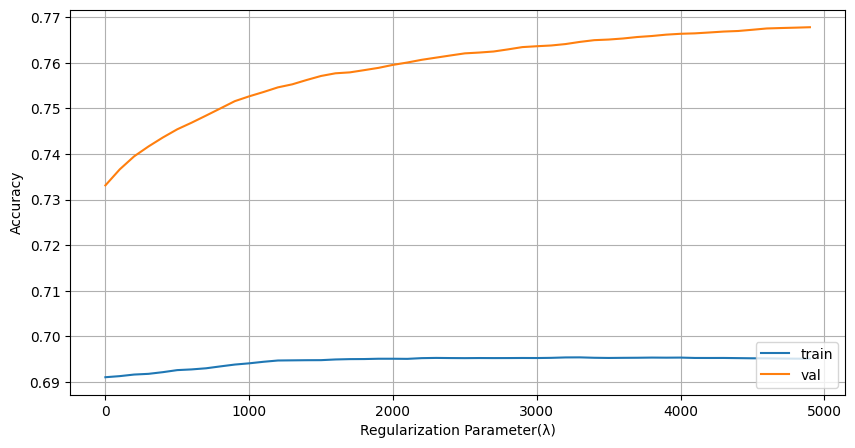

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [ ]:
model = LogisticRegression(C=1/1000,max_iter=1000)
model.fit(x_sm,y_sm)


LogisticRegression(C=0.001, max_iter=1000)

### CLASSIFICATION METRICS

In [ ]:
print('ACCURACY:')
print('Train data:', model.score(x_sm, y_sm).round(2))
print('Validation data:', model.score(x_val_scaled, y_val).round(2))


ACCURACY:
Train data: 0.69
Validation data: 0.75


In [ ]:
y_val_pred = model.predict(x_val_scaled)


In [ ]:
print('VALIDATION DATA:')
print('Precision Score:',precision_score(y_val,y_val_pred).round(2))
print('Recall Score:',recall_score(y_val,y_val_pred).round(2))
print('F1 Score:',f1_score(y_val,y_val_pred).round(2))




VALIDATION DATA:
Precision Score: 0.89
Recall Score: 0.79
F1 Score: 0.84


In [ ]:
print(classification_report(y_val,y_val_pred))

              precision    recall  f1-score   support

           0       0.41      0.60      0.49     14526
           1       0.89      0.79      0.84     59090

    accuracy                           0.75     73616
   macro avg       0.65      0.69      0.66     73616
weighted avg       0.79      0.75      0.77     73616



### CONFUSION MATRIX

In [ ]:
cm = confusion_matrix(y_val, y_val_pred)
cm

array([[ 8682,  5844],
       [12362, 46728]])

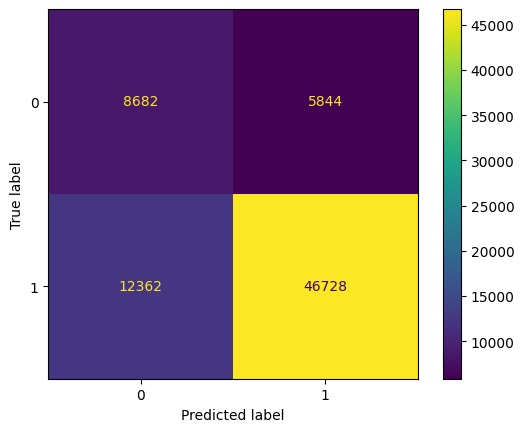

In [ ]:
ConfusionMatrixDisplay(cm).plot();


### MULTI-COLINEARITY CHECK USING VIF

In [ ]:
def calc_vif(X):
  vif = pd.DataFrame()
  vif['features'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]   # i represents each col
  vif['VIF'] = round(vif['VIF'],2)
  vif = vif.sort_values(by='VIF',ascending=False)
  return vif

In [ ]:
x_t = pd.DataFrame(x_sm)


calc_vif(x_t)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,features,VIF
15,application_type,61.95
5,home_ownership,16.09
10,open_acc,13.10
14,total_acc,11.86
3,grade,11.13
2,int_rate,10.41
13,revol_util,10.08
9,dti,9.11
6,annual_inc,7.66
0,loan_amnt,6.83


In [ ]:
x_t = x_t.drop('application_type',axis=1)
x_val_scaled = x_val_scaled.drop('application_type',axis=1)
x_test_scaled = x_test_scaled.drop('application_type',axis=1)

calc_vif(x_t)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,features,VIF
10,open_acc,13.07
5,home_ownership,12.73
14,total_acc,11.68
13,revol_util,9.92
9,dti,8.95
2,int_rate,8.82
3,grade,8.20
6,annual_inc,7.30
0,loan_amnt,6.82
12,revol_bal,5.04


In [ ]:
x_t = x_t.drop('open_acc',axis=1)
x_val_scaled = x_val_scaled.drop('open_acc',axis=1)
x_test_scaled = x_test_scaled.drop('open_acc',axis=1)

calc_vif(x_t)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,features,VIF
5,home_ownership,12.64
12,revol_util,9.33
2,int_rate,8.69
9,dti,8.60
3,grade,8.16
13,total_acc,7.44
6,annual_inc,7.27
0,loan_amnt,6.81
11,revol_bal,4.76
10,pub_rec,4.67


In [ ]:
x_t = x_t.drop('home_ownership',axis=1)
x_val_scaled = x_val_scaled.drop('home_ownership',axis=1)
x_test_scaled = x_test_scaled.drop('home_ownership',axis=1)

calc_vif(x_t)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,features,VIF
11,revol_util,9.20
8,dti,8.51
2,int_rate,8.17
12,total_acc,7.34
3,grade,7.17
5,annual_inc,7.00
0,loan_amnt,6.80
10,revol_bal,4.74
9,pub_rec,4.67
14,pub_rec_bankruptcies,4.47


In [ ]:
x_t = x_t.drop('revol_util',axis=1)
x_val_scaled = x_val_scaled.drop('revol_util',axis=1)
x_test_scaled = x_test_scaled.drop('revol_util',axis=1)

calc_vif(x_t)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,features,VIF
8,dti,8.34
11,total_acc,7.05
5,annual_inc,6.93
0,loan_amnt,6.72
3,grade,6.47
2,int_rate,6.44
9,pub_rec,4.66
13,pub_rec_bankruptcies,4.47
7,purpose,4.14
14,zip_code,4.14


In [ ]:
x_t = x_t.drop('dti',axis=1)
x_val_scaled = x_val_scaled.drop('dti',axis=1)
x_test_scaled = x_test_scaled.drop('dti',axis=1)

calc_vif(x_t)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,features,VIF
0,loan_amnt,6.72
5,annual_inc,6.34
3,grade,6.22
10,total_acc,6.15
2,int_rate,5.84
8,pub_rec,4.66
12,pub_rec_bankruptcies,4.47
13,zip_code,4.14
7,purpose,4.08
4,emp_length,3.80


In [ ]:
x_t = x_t.drop('loan_amnt',axis=1)
x_val_scaled = x_val_scaled.drop('loan_amnt',axis=1)
x_test_scaled = x_test_scaled.drop('loan_amnt',axis=1)

calc_vif(x_t)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,features,VIF
2,grade,6.20
9,total_acc,6.13
1,int_rate,5.59
4,annual_inc,5.31
7,pub_rec,4.66
11,pub_rec_bankruptcies,4.47
12,zip_code,4.14
6,purpose,3.97
3,emp_length,3.80
10,mort_acc,3.47


In [ ]:
x_t = x_t.drop('grade',axis=1)
x_val_scaled = x_val_scaled.drop('grade',axis=1)
x_test_scaled = x_test_scaled.drop('grade',axis=1)

calc_vif(x_t)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss


,features,VIF
8,total_acc,5.78
3,annual_inc,5.17
1,int_rate,4.99
6,pub_rec,4.66
10,pub_rec_bankruptcies,4.47
11,zip_code,3.82
5,purpose,3.80
2,emp_length,3.64
7,revol_bal,3.45
9,mort_acc,2.93


In [ ]:
model1 = LogisticRegression(C=1/1000,max_iter=1000)
model1.fit(x_t,y_sm)

LogisticRegression(C=0.001, max_iter=1000)

In [ ]:
y_val_pred = model1.predict(x_val_scaled)


In [ ]:
print('VALIDATION DATA:')
print('Precision Score:',precision_score(y_val,y_val_pred).round(2))
print('Recall Score:',recall_score(y_val,y_val_pred).round(2))
print('F1 Score:',f1_score(y_val,y_val_pred).round(2))


VALIDATION DATA:
Precision Score: 0.88
Recall Score: 0.79
F1 Score: 0.83


In [ ]:
print(classification_report(y_val,y_val_pred))


              precision    recall  f1-score   support

           0       0.39      0.57      0.47     14526
           1       0.88      0.79      0.83     59090

    accuracy                           0.74     73616
   macro avg       0.64      0.68      0.65     73616
weighted avg       0.79      0.74      0.76     73616



### INFERENCE:

Using VIF and dropping columns didnt improve the performance instead it started reducing after a while. So, to avoid data loss we stick on to model created with all these column in x_train dataset

## FINAL MODEL IMPLEMENTATION FOR TEST DATA

In [ ]:
x_val_scaled = pd.DataFrame(scaler.transform(x_val),columns = x_val.columns)
x_test_scaled = pd.DataFrame(scaler.transform(x_test),columns = x_test.columns)

y_pred = model.predict(x_test_scaled)

In [ ]:
pd.Series((zip(x.columns,model.coef_[0])))

0                (loan_amnt, -0.5228805227757707)
1                                     (term, 0.0)
2                  (int_rate, -1.824343328776462)
3                     (grade, 0.3092431291578944)
4              (emp_length, 0.036013450079909706)
5           (home_ownership, 0.07688520962984229)
6                (annual_inc, 0.9469457109104218)
7     (verification_status, -0.12766228165306653)
8                 (purpose, -0.04045163720733852)
9                      (dti, -0.9605800866654961)
10               (open_acc, -0.37552522714429765)
11                (pub_rec, -0.17017158123523085)
12               (revol_bal, 0.21205735209530727)
13             (revol_util, -0.42565060958530154)
14                (total_acc, 0.2529541216321204)
15       (application_type, -0.05318261942111988)
16               (mort_acc, -0.28569694461507744)
17    (pub_rec_bankruptcies, 0.09546653217327909)
18                    (zip_code, 2.2504040278872)
dtype: object

In [ ]:

print('TEST DATA:')
print('--------------')
print('ACCURACY : ',model.score(x_test_scaled,y_test).round(2))
print('PRECISION_SCORE : ',precision_score(y_test,y_pred).round(2))
print('RECALL_SCORE : ',recall_score(y_test,y_pred).round(2))
print('F1_SCORE : ',f1_score(y_test,y_pred).round(2))


TEST DATA:
--------------
ACCURACY :  0.75
PRECISION_SCORE :  0.89
RECALL_SCORE :  0.79
F1_SCORE :  0.84


In [ ]:
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.41      0.60      0.49     14562
           1       0.89      0.79      0.84     59054

    accuracy                           0.75     73616
   macro avg       0.65      0.70      0.66     73616
weighted avg       0.80      0.75      0.77     73616



In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 8759,  5803],
       [12406, 46648]])

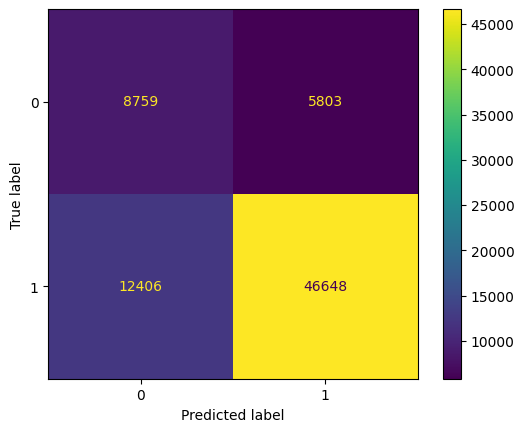

In [ ]:
ConfusionMatrixDisplay(cm).plot();


### INFERENCE:

1. It can be observed that the **precision score** is very high (our model is able to identify **89%** of **loyal borrowers**) but the recall score is low  (of all the predicted loyal borrowers, only 79% are actually loyal).

2. There is a decent trade off between precision and recall.High precision meaans type 1 error (false alarm is reduced), thus many deserving customers would get benefitted

3. This model can also be made effective in reducing NPAs by flagging most of the defaulters, which can be achieved by increasing recall score.

3. Anyway, decent trade off between precision and recall caused **F1 score** to raise to **84%** even though accuracy is 75%

### ROC AUC CURVES:


In [ ]:
y_pred = model.predict(x_test_scaled)

probability = model.predict_proba(x_test_scaled)
probability[:10]

array([[0.38321323, 0.61678677],
       [0.35851057, 0.64148943],
       [0.91240953, 0.08759047],
       [0.43047777, 0.56952223],
       [0.35782799, 0.64217201],
       [0.24909374, 0.75090626],
       [0.37003633, 0.62996367],
       [0.9176359 , 0.0823641 ],
       [0.43288462, 0.56711538],
       [0.31826406, 0.68173594]])

Now, we extract the class 1 probabilities as we are always more concerned about class 1 rather than class 0. Also, here we are more interested to learn about the defaulters

In [ ]:

probabilities = probability[:,1]

probabilities

array([0.61678677, 0.64148943, 0.08759047, ..., 0.33538481, 0.3790824 ,
       0.69253768])

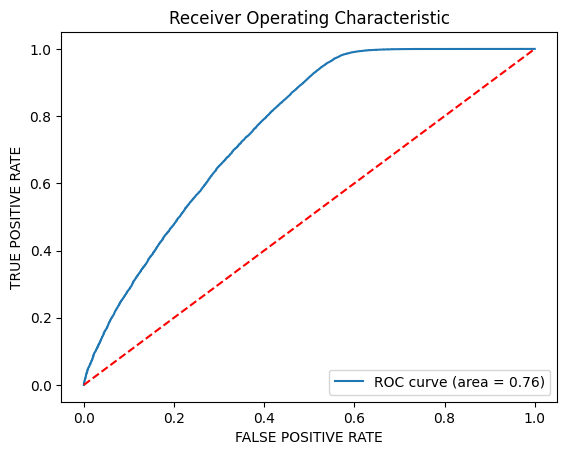

In [ ]:
# Compute the false positive rate, true positive rate, and thresholds
fpr,tpr,threshold = roc_curve(y_test,probabilities)

# compute area under the curve
roc_auc = auc(fpr, tpr)

#plot the ROC curve
plt.plot(fpr, tpr,label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0,1], [0, 1], '--', color='red')
plt.xlabel('FALSE POSITIVE RATE')
plt.ylabel('TRUE POSITIVE RATE')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
roc_auc_score(y_test,probabilities)


0.7648197659879264

### INFERENCE:

We can vividly understand from the graph that,

1. AUC 0f **76%** signifies that the model ia able to discriminate well between the positive and begative class.

2. But it is not a good measure for an imbalanced target variable because it may be high even when the classifier has a poor score on the minority class.

3. This can happen when the classifier performs well on the majority class instances, which dominate the dataset. As a result, the AUC may appear high, but the model may not effectively identify the minority class instances.


Lets plot the Precision-Recall curve which is more suited for evaluation of imbalanced data



### PRECISION RECALL CURVE


This works well when there exists a inverse relation between recall and precision and we have such relation in our model

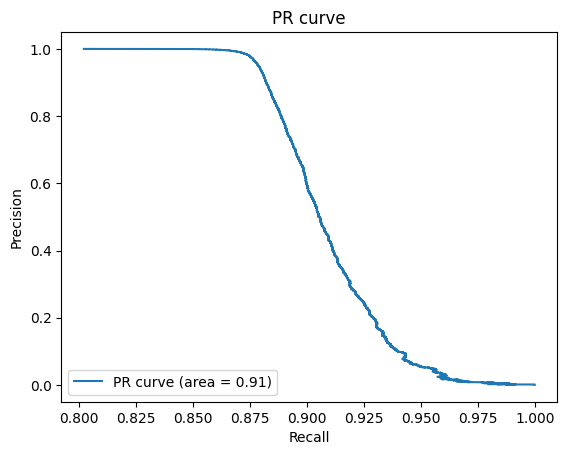

In [ ]:
# Compute the false precision and recall at all thresholds
precision, recall, threshold = precision_recall_curve(y_test, probabilities)

# Area under Precision Recall Curve
auprc = average_precision_score(y_test, probabilities)

# Plot the precision-recall curve
plt.plot(precision,recall, label='PR curve (area = %0.2f)' % auprc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.legend(loc="lower left")
plt.show()


### INFERENCE:

Its obvious from the graph that,

1. Precision and Recall are **inversely related** i.e., when precision is 1(max) recall is 0.8(min) whereas when precision is 0.00001(min) recall is 1(max)

2. Here, we are concerned with **loyal borrowers detection** which is related to precision(**lowering type 1 error**) our model should focus on **better precision** value which has to be **traded off** with the **recall** value.

3. The PR Curve score turns out to be **91%** which implies that the model is doing significantly well but there is still a room for improvement

### FEATURE IMPORTANCE

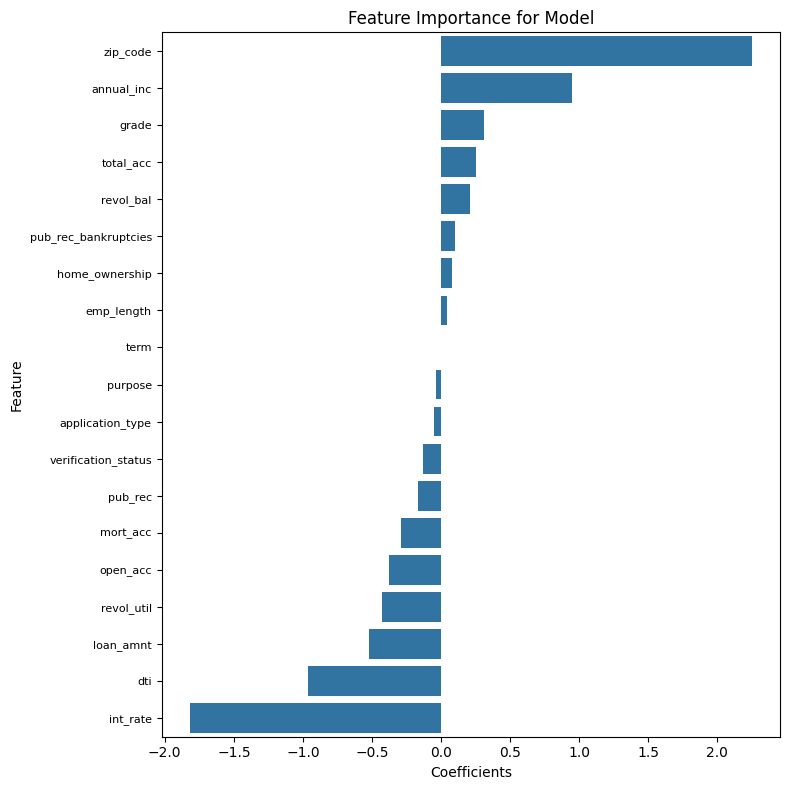

In [ ]:
feature_imp = pd.DataFrame({'Columns':x_sm.columns, 'Coefficients':model.coef_[0]}).round(2).sort_values('Coefficients', ascending=False)

plt.figure(figsize=(8,8))
sns.barplot(y = feature_imp['Columns'],
           x =  feature_imp['Coefficients'])
plt.title("Feature Importance for Model")
plt.yticks(fontsize=8)
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

### INFERENCE:

1. The model has assigned large weightage to zip_code features followed by annual income, grade

2. Similarly, large negative coefficients are assigned to int_rate,dti

## QUESTIONNAIRE:

### 1. What percentage of customers have fully paid their Loan Amount?

Around 80.3% Customers have fully paid their Loan Amount

In [ ]:

(df['loan_status'].value_counts(normalize=True) * 100).get(1)

80.28711227752738

### 2.  Comment about the correlation between Loan Amount and Installment features.

From our analysis, we discovered that the loan amount and installment exhibit a strong correlation, with a coefficient of 0.95.

This indicates a robust relationship between the two variables, suggesting that customers who take out loans are consistently repaying them within the specified term duration.

The strong correlation between the loan amount and installment suggests a good relationship between them because as the loan amount increases, the installment amount also tends to increase proportionally.

This implies that customers who borrow larger amounts typically agree to higher installment payments to repay the loan within the specified term duration.

Therefore, the correlation reflects the consistent repayment behavior of customers in relation to their loan amounts.


### 3. The majority of people have home ownership as _______.


In [ ]:
df['home_ownership'].value_counts()

MORTGAGE    179184
RENT        153805
OWN          34953
OTHER          107
NONE            28
ANY              2
Name: home_ownership, dtype: int64

In [ ]:
(df['home_ownership'].value_counts(normalize=True)*100).get("MORTGAGE")


48.68085383844229

Our analysis reveals that a significant portion of customers, accounting for **48.65%** of the total, have selected "**MORTGAGE**" as their home ownership status, indicating it as the most prevalent category among customers.


### 4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)

Contrary to expectations, our analysis reveals that customers assigned the grade "G" are more likely to fully pay off their loan amounts compared to those with higher grades such as "A". This is evident from the distribution observed in the graph(impact of categorical features on loan status), where a larger proportion of customers with grade "G" have fully paid their loans, indicating a noteworthy trend.


### 5. Name the top 2 afforded job titles.

Teacher          -          4387

Manager          -          4249


Based on our analysis, the professions of "Teacher" and "Manager" emerge as the top two job titles associated with affordable loan amounts. These occupations exhibit the highest frequency among employees, indicating their prevalence as affordable job titles within the dataset.
Upon examination of job titles concerning loan amounts, it is evident that the professions of "Teacher" and "Manager" stand out. These occupations are characterized by loan amounts that are deemed affordable, representing a significant portion of the dataset's loan recipients.


### 6. Thinking from a bank's perspective, which metric should our primary focus be on..

From a bank's perspective, the primary focus should be on metrics related to the borrower's ability to repay the loan and the associated risks. Therefore, the key metrics of interest would likely include:

1.  **Loan Status:** Understanding the proportion of loans that have been fully paid off versus those that are not paid off.

2.  **Annual Income:** Assessing the borrower's income level to determine their capacity to repay the loan.

3.  **Debt-to-Income Ratio (DTI):** Evaluating the borrower's level of debt relative to their income, which indicates their ability to manage additional debt.

4.  **Credit History:** Reviewing factors such as credit score, length of credit history, and any past credit issues to assess the borrower's creditworthiness.

5.  **Purpose of the Loan:** Understanding the intended use of the loan funds to assess the risk associated with different types of loans.

6.  **Employment Information:** Analyzing employment status, length of employment, and job stability to gauge the borrower's financial stability and likelihood of continued income.

These metrics provide insights into the borrower's financial health, repayment capability, and risk profile, allowing the bank to make informed lending decisions and mitigate potential risks associated with loan defaults.

According to the model's evaluation, the ROC-AUC curve plays a crucial role in assessing prediction performance and behavior. It illustrates the relationship between False Positive Rate (FPR) and True Positive Rate (TPR), providing insights into the model's discriminatory power.

When evaluating precision, we observe that 89% of the total positive predictions for the target variable are true positives and false positives. This indicates that the model identifies good rate of true positives correctly.

During the analysis of recall values, it was noted that the model achieved a recall rate of 79%. This metric signifies the proportion of actual positives correctly identified by the model, emphasizing the importance of minimizing false negatives. However, the observed recall rate of 79% suggests room for improvement, indicating an area that requires primary focus.

The F1 score (84%) combines precision and recall into a single metric, calculated as the harmonic mean of the two. A higher F1 score indicates better model accuracy. While achieving a 75% accuracy in modeling is satisfactory, there remains room for improvement in maximizing the F1 score for enhanced accuracy.


### 7. How does the gap in precision and recall affect the bank?

The gap between precision and recall in the classification report indicates a disparity between the model's ability to correctly identify positive cases (precision) versus its ability to capture all actual positive cases (recall).
The gap between precision and recall reflects a trade-off between minimizing false positives (precision) and false negatives (recall). Balancing these metrics is crucial for the bank to optimize its lending decisions, ensuring both risk mitigation and business growth.


1. Precision (0.89): The high precision suggests that when the model predicts a positive outcome (e.g., loan approval), it is correct 89% of the time. This means that most of the approved loans are indeed likely to be repaid, reducing the risk of defaults. However, the drawback is that some potentially eligible borrowers may be wrongly rejected.
2. Recall (0.79): The moderate recall indicates that the model captures 79% of all actual positive cases (e.g., borrowers who would repay their loans). This implies that while the model identifies a significant portion of creditworthy borrowers, it may miss out on a substantial number of such cases. Consequently, the bank may lose out on profitable lending opportunities and potential revenue.


Thus a good amount of tradeoff depending on the scenario exists between precision and recall which makes the model work good.

### 8. Which were the features that heavily affected the outcome?

The model has assigned large weightage to zip_code features followed by annual income, grade.Similarly, large negative coefficients are assigned to int_rate,dti

## INSIGHTS:


**Impact of Categorical Attributes on loan_status** (target variable):

1. The % of defaulters is much higher for longer (60-month) term

2. As expected, grade/sub-grade has the maximum impact on loan_status with highest grade having maximum defaulters

3. Zip codes such as 11650, 86630 and 93700 have 100% defaulters

4. We can remove initial_list_status and state as they have no impact on loan_status

5. Direct pay application type has higher default rate compared to individual/joint

6. Loan taken for the purpose of small business has the highest rate of default.


**Impact of Numerical Attributes on loan_status** (target variable):

1. It can be observed that the mean loan_amnt, int_rate, dti, open_acc and revol_util are higher for defaulters

2. The mean annual income is lower for defaulters

**Model and its classification metrics:**

1. A Logistic Regression model trained after upsampling the data to balance the target variable using SMOTE performed well, rendering accuracy of 75%.

2. The model had a precision score of 89%, recall score of 79%, and f1 score of 84% on the positive class

3. The model had a precision score of 49%, recall score of 60%, and f1 score of 49% on the negative class

4. The ROC plot shows that the area under ROC curve is 0.76 (can be improved using hyperparameter tuning/increasing model complexity)

5. The area under Precision Recall curve is 0.91 whichsignifies that the model is able to differentiate well between both

## RECOMMENDATIONS:

1. The credit line can be extended to 80% of the customers who are the loyal borrowers and the repayment term should be low i.e., 36 months as there are more defaulters if the term extended to 60 months.

2. The optimal strategy to achieve the objective of balancing the risk of increasing NPAs by disbursing loans to defaulters with the opportunity to earn interest by disbursing loans to as many worthy customers as possible: maximise the F1 score along with the area under Precision Recall Curve (precision-recall trade-off)

3. More complex classifiers like random forest would give better results compared to logistic regression because they are not restricted by the linearity of decision boundary.